# Dataset Information


Data Analysis Project by [**Faizah Mappanyompa**](https://www.instagram.com/notesbyvaii_)

**Bike sharing systems** are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Attribute Information


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



## Pertanyaan Bisnis

1. Bagaimana demografi pengguna sepeda?
2. Pada jam berapa paling banyak dan sedikit pengguna menyewa sepeda?


# Library

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# Data Wrangling

## Data Gathering

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df_bike = pd.read_csv('/content/hour.csv')

In [79]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Assesing

### Check info

In [80]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [81]:
df_bike.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Check missing values

In [82]:
df_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check Duplicates

In [83]:
df_bike.duplicated().sum()

0

## Data Cleaning

In [84]:
# convert datetime datatypes from objects to datetime
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])

In [85]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Exploratory Data Analysis (EDA) and Data Visualization

## 1. Bagaimana demografi pengguna sepeda?

### Berdasarkan Season

In [86]:
season_dict = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Fall"
}

df_bike['season_name'] = df_bike['season'].map(season_dict)

In [87]:
df_bike[['season','season_name']]

,season,season_name
0,1,Winter
1,1,Winter
2,1,Winter
3,1,Winter
4,1,Winter
...,...,...
17374,1,Winter
17375,1,Winter
17376,1,Winter
17377,1,Winter


In [88]:
df_season = df_bike.groupby('season_name').agg({
    'cnt' : 'sum'
}).reset_index()

df_season.rename(columns={
    'cnt' : 'user_count'
}, inplace=True)

df_season

,season_name,user_count
0,Fall,841613
1,Spring,918589
2,Summer,1061129
3,Winter,471348


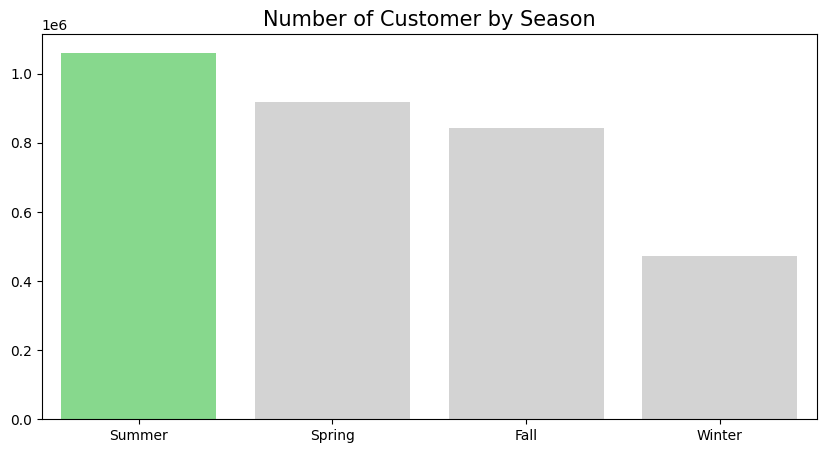

In [89]:
colors = ['#7AE582','#D3D3D3','#D3D3D3','#D3D3D3']

plt.figure(figsize=(10,5))
sns.barplot(
    y="user_count",
    x='season_name',
    data = df_season.sort_values(by='user_count', ascending=False),
    palette=colors
)

plt.title("Number of Customer by Season", loc='center', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Berdasarkan Weather Condition

In [90]:
weather_dict = {
    1: "Mostly clear",
    2: "Mist clouds",
    3: "Light rain/snow",
    4: "Heavy rain/snow"
}

df_bike['weather_name'] = df_bike['weathersit'].map(weather_dict)

In [91]:
df_bike[['weather_name','weathersit']]

,weather_name,weathersit
0,Mostly clear,1
1,Mostly clear,1
2,Mostly clear,1
3,Mostly clear,1
4,Mostly clear,1
...,...,...
17374,Mist clouds,2
17375,Mist clouds,2
17376,Mostly clear,1
17377,Mostly clear,1


In [92]:
df_weather = df_bike.groupby('weather_name').agg({
    'cnt' : 'sum'
}).reset_index()

df_weather.rename(columns={
    'cnt' : 'user_count'
}, inplace=True)

df_weather

,weather_name,user_count
0,Heavy rain/snow,223
1,Light rain/snow,158331
2,Mist clouds,795952
3,Mostly clear,2338173


In [93]:
df_bike[df_bike['weather_name'] == 'Heavy rain/snow']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weather_name
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36,Winter,Heavy rain/snow
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164,Winter,Heavy rain/snow
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23,Winter,Heavy rain/snow


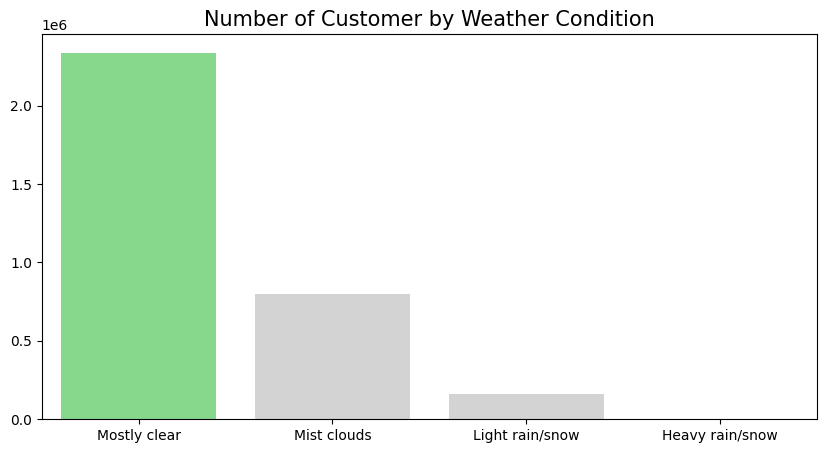

In [94]:
colors = ['#7AE582','#D3D3D3','#D3D3D3']

plt.figure(figsize=(10,5))
sns.barplot(
    y="user_count",
    x='weather_name',
    data = df_weather.sort_values(by='user_count', ascending=False),
    palette=colors
)

plt.title("Number of Customer by Weather Condition", loc='center', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Berdasarkan Workingday dan Seasonnya

In [95]:
df_workingday = df_bike.groupby('workingday').agg({
    'cnt' : 'sum'
}).reset_index()

df_workingday.rename(columns={
    'instant' : 'user_count'
}, inplace=True)

df_workingday

,workingday,cnt
0,0,1000269
1,1,2292410


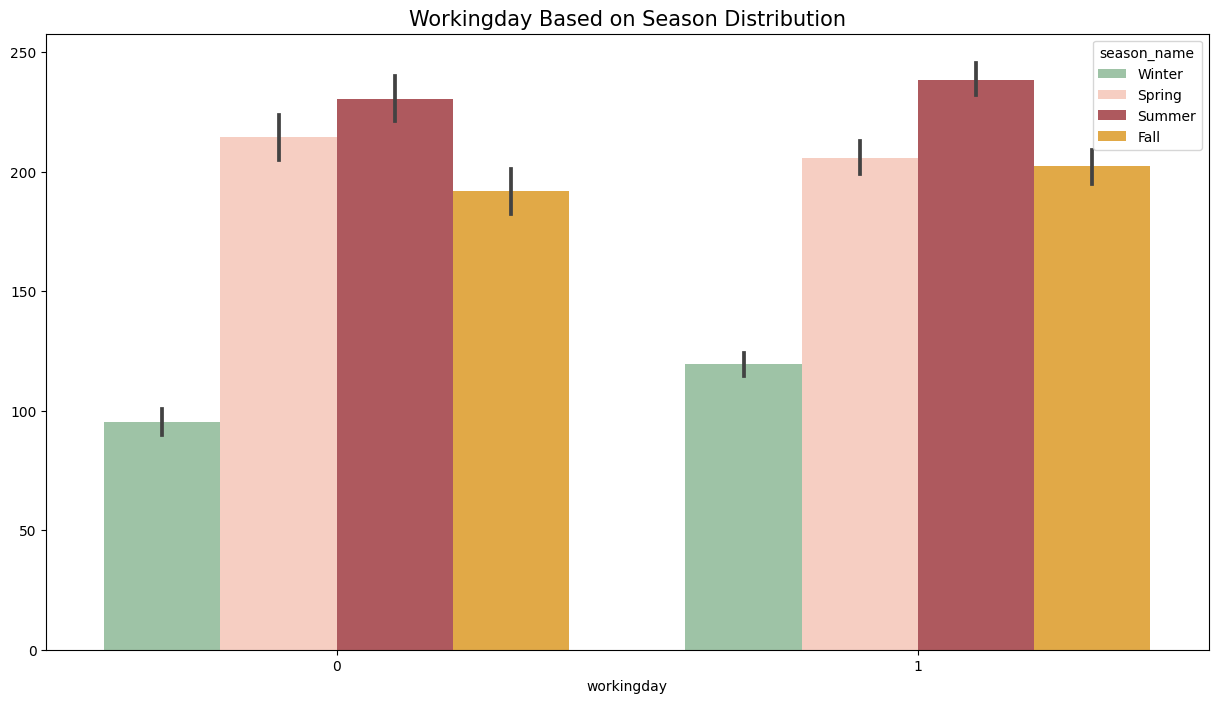

In [96]:
fig,ax=plt.subplots(figsize=(15,8))

colors_2 = ['#98c9a3','#ffc9b9','#bc4b51','#fbb02d']
sns.barplot(data=df_bike,x='workingday',y='cnt',hue='season_name',palette=colors_2)
plt.title('Workingday Based on Season Distribution', loc='center', fontsize=15)
plt.ylabel(None)
plt.show()

## 2. Pada jam berapa paling banyak dan sedikit pengguna menyewa sepeda?

In [97]:
df_bike['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [98]:
df_bike[df_bike['hr'] == 16]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weather_name
16,17,2011-01-01,1,0,1,16,0,6,0,2,0.42,0.4242,0.82,0.2985,41,52,93,Winter,Mist clouds
39,40,2011-01-02,1,0,1,16,0,0,0,3,0.34,0.3333,0.71,0.1642,9,67,76,Winter,Light rain/snow
61,62,2011-01-03,1,0,1,16,0,1,1,1,0.26,0.2424,0.30,0.2537,9,67,76,Winter,Mostly clear
84,85,2011-01-04,1,0,1,16,0,2,1,1,0.30,0.2879,0.49,0.2537,15,68,83,Winter,Mostly clear
107,108,2011-01-05,1,0,1,16,0,3,1,1,0.30,0.3182,0.28,0.0896,4,85,89,Winter,Mostly clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,17276,2012-12-27,1,1,12,16,0,4,1,2,0.26,0.2424,0.52,0.2836,23,151,174,Winter,Mist clouds
17299,17300,2012-12-28,1,1,12,16,0,5,1,1,0.30,0.3030,0.49,0.1343,42,208,250,Winter,Mostly clear
17323,17324,2012-12-29,1,1,12,16,0,6,0,1,0.30,0.2424,0.75,0.1045,22,125,147,Winter,Mostly clear
17347,17348,2012-12-30,1,1,12,16,0,0,0,1,0.28,0.2424,0.38,0.4179,31,102,133,Winter,Mostly clear


In [99]:
df_bike_hr = df_bike.groupby('hr').agg({
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False).reset_index()

df_bike_hr

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


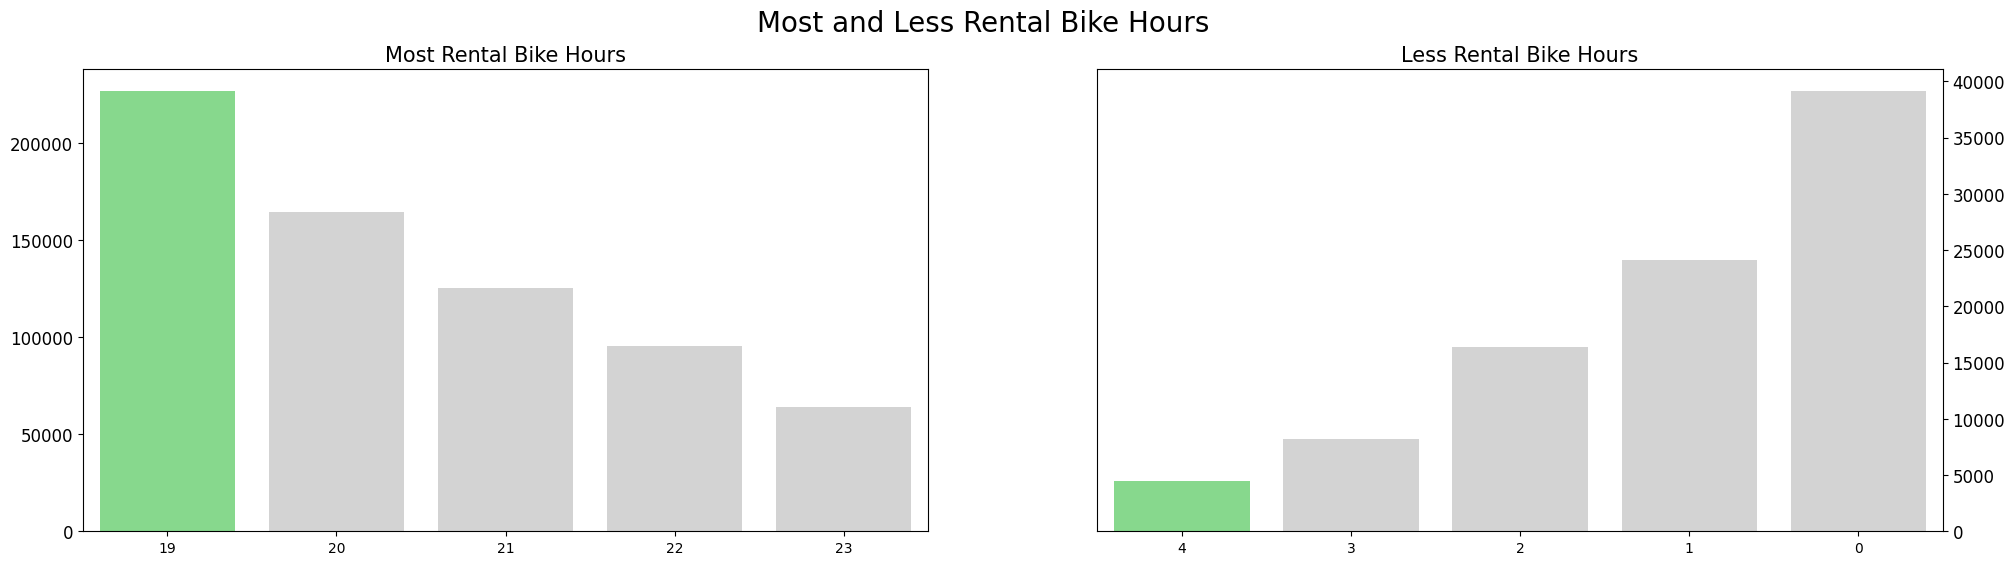

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ['#7AE582','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3']
colors_2 = ['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#7AE582']

sns.barplot(x="hr", y="cnt", data=df_bike_hr.sort_values(by="hr", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Rental Bike Hours", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="hr", y="cnt", data=df_bike_hr.sort_values(by="hr", ascending=True).head(5), palette=colors_2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Less Rental Bike Hours", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most and Less Rental Bike Hours", fontsize=20)
plt.show()

# Conclusion

**1. Bagaimana demografi pengguna sepeda?**
- Berdasarkan visualisasi di atas demografi pelanggan berdasarkan season, pelanggan yang menyewa sepeda lebih banyak pada musim panas (Summer) dan paling sedikit pada musim salju (Winter).

- Berdasarkan Weather Condition atau sistuasi cuaca, banyak pelanggan menyewa sepeda pada cuaca cerah (Mostly Clear) dan sedikit pada cuaca hujan atau salju (Heavy Rain/Snow).

- Berdasarkan Working day atau hari kerja dan seasonnya, banyak pelanggan menyewa sepeda pada musim panas di hari kerja (bernilai 1) dibandingkan hari libur.

**2. Pada jam berapa paling banyak dan sedikit pengguna menyewa sepeda?**
- Pengguna menyewa sepeda paling banyak pada jam 17 diikuti jam 18. Paling sedikit pada jam 4 pagi diikuti jam 3 pagi.